## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

intermediate_save_path = "Intermediate_outputs/"

In [3]:
# Reading loan.csv file and creating Pandas dataframe
df1 = pd.read_csv("loan.csv")

In [4]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df1.shape

(39717, 111)

In [6]:
# Checking the null values 
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## Removing colums which does not hold any importance in our analysis
* Removing column which hold only null values or single value as they dont hold any importance

In [8]:
# Removing columns with only null values
df1 = df1.dropna(axis = 1, how = 'all')
df1.shape

(39717, 57)

In [9]:
# removing column which have single value in them 
unique_counts = df1.nunique()
df1 = df1.loc[:, unique_counts > 1]


In [10]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [11]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

## Points
  *  So this analysis is ot be done on the customer who are yet to take Loans so out of this 48 columns we can remove those columns which store data after the loan is approved.
  *  We can also remove the unique categorical columns such as ("member_id", "url", "id" etc) which will not help us in analysing the data for loan approval

In [13]:
# list of post approval columns
post_approval_and_extra_details = [
    "id", "member_id", "url", "title", "emp_title", 
    "zip_code", "last_credit_pull_d", "addr_state",
    "desc","out_prncp_inv","total_pymnt_inv",
    "funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", 
    "total_pymnt", "total_rec_prncp", "total_rec_int", 
    "total_rec_late_fee", "recoveries", "collection_recovery_fee", 
    "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" ,
    "mths_since_last_delinq", "mths_since_last_record",
    "pub_rec_bankruptcies"
]


In [14]:
df1 = df1.drop(post_approval_and_extra_details, axis=1,errors ='ignore')

In [15]:
df1.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


## Data CleanUp process
* Since the extra columns are dropped now we can look into the data. 

In [17]:
# Saving first instance after initial steps
df1.to_csv(f'{intermediate_save_path}Loan_reduced_columns.csv', index=False)

In [18]:
df2 = pd.read_csv('Loan_reduced_columns.csv')

In [19]:
df2.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


## Analysis on `"Fully Paid"` and `"Charged Off"` loan categories
* Since the analysis is on the customers who are going to be loan defaulters we cann't get any thing from the data were loan is already in progress, i.e, their loan is already in progress

In [21]:
df2['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [22]:
# Filtering the dataset for 'Fully Paid' and 'Charged Off' loan categories
df2 = df2[df2['loan_status'].isin(['Fully Paid', 'Charged Off'])]

## Data cleanUp and standarization
* Replacing or imputting null values as we can't remove them because bank data is a sensitive data  

In [24]:
#Null values check
df2.isna().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

### Columns we need to check are 
* emp_length
* revol_util

In [26]:
df2[df2['emp_length'].isnull()]
# Nothing seems to be out of ordinary with the null in "emp_length"

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
168,2500,2500.00000,36 months,7.51%,77.78,A,A3,NaN,OWN,12000.0,...,Dec-11,Charged Off,debt_consolidation,16.30,Aug-94,2,13,0,42.20%,20
323,18000,18000.00000,60 months,17.58%,452.98,D,D4,NaN,MORTGAGE,60000.0,...,Dec-11,Fully Paid,debt_consolidation,21.96,Mar-03,1,11,0,83.70%,28
394,4000,4000.00000,36 months,11.71%,132.31,B,B3,NaN,RENT,24000.0,...,Dec-11,Fully Paid,home_improvement,7.50,Feb-05,0,4,0,54.90%,6
422,1000,1000.00000,36 months,14.65%,34.50,C,C3,NaN,RENT,18408.0,...,Dec-11,Charged Off,major_purchase,6.00,Apr-93,2,3,1,83.70%,8
439,8250,8250.00000,36 months,7.51%,256.67,A,A3,NaN,MORTGAGE,31500.0,...,Dec-11,Fully Paid,debt_consolidation,17.87,Dec-81,4,17,0,10.40%,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,10000,9975.00000,36 months,14.22%,342.85,C,C5,NaN,RENT,45000.0,...,Jan-10,Fully Paid,small_business,4.51,Sep-00,0,9,0,66.40%,17
32608,3700,3700.00000,36 months,14.22%,126.86,C,C5,NaN,RENT,17496.8,...,Jan-10,Fully Paid,other,3.36,Aug-06,0,2,0,45.90%,5
32621,10000,9731.17513,36 months,14.22%,342.85,C,C5,NaN,MORTGAGE,36000.0,...,Jan-10,Charged Off,other,3.83,Apr-00,3,3,0,34.40%,19
32631,6000,6000.00000,36 months,12.73%,201.40,C,C1,NaN,MORTGAGE,60000.0,...,Jan-10,Fully Paid,moving,12.80,Oct-01,0,7,1,63.30%,12


In [27]:
df2['emp_length'].value_counts()
# here clearly '10+ year' has highest presence on compared with other values, so we will impute null values with '10+ year'.

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [28]:
df2['emp_length'].fillna(df2['emp_length'].mode()[0], inplace=True)

In [29]:
df2.isna().sum()

loan_amnt               0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util             50
total_acc               0
dtype: int64

In [30]:
df2['emp_length'].value_counts()

emp_length
10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [31]:
print(pd.__version__)

2.1.4


In [32]:
df2['emp_length'] = pd.to_numeric(
    df2['emp_length'].apply(lambda x: 
        0 if pd.isna(x) or "<" in str(x) else str(x).split('+')[0] if "10+" in str(x) else str(x).split()[0]
    )
)


In [33]:
# Now we have replaced null values with most frequent values so lets also standardize this column by removing extra bits like 'year', '<', '+'
df2['emp_length'] = pd.to_numeric(
    df2['emp_length'].apply(lambda x: 
        0 if pd.isna(x) or "<" in str(x) else str(x).split('+')[0] if "10+" in str(x) else str(x).split()[0]
    )
)

In [34]:
# Now lets check "revol_util" column, here alsp most record is made of 0% so lets replace Null with 0%
df2['revol_util'].value_counts()

revol_util
0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1088, dtype: int64

In [35]:
df2['revol_util'].fillna(df2['revol_util'].mode()[0], inplace=True)

In [36]:
df2.isna().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
dtype: int64

In [37]:
# Now we have replaced null values with most frequent values so lets also standardize this column by removing '%' signs
df2['int_rate'] = df2['int_rate'].apply(lambda x: x.split('%')[0])
df2['revol_util'] = df2['revol_util'].apply(lambda x: x.split('%')[0])
df2['sub_grade'] = pd.to_numeric(
    df2['sub_grade'].apply(lambda x: str(x)[-1] if pd.notna(x) else None)
)

## OutLiers
* Checking for outliers in numerical the data
    * annual_inc
    * loan_amnt
    * funded_amnt_inv
    * int_rate
    * installment
    * dti
    * revol_util

* `annual_inc`

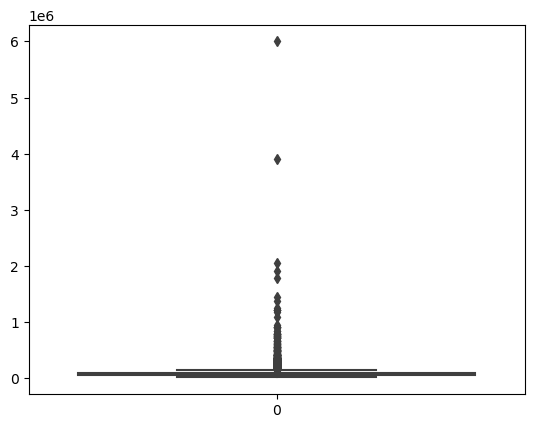

In [40]:
sns.boxplot(df2['annual_inc'])
plt.show()

## Clearly there are outliers in this column, so we need to remove them for better alanlysis
* To check this we will be using quantile to check the destricution of values in this column

In [42]:
df2['annual_inc'].quantile([0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1])

0.50      58868.0
0.55      61400.0
0.60      65004.0
0.65      70200.0
0.70      75000.0
0.75      82000.0
0.80      90000.0
0.85     100000.0
0.90     115000.0
0.95     140004.0
1.00    6000000.0
Name: annual_inc, dtype: float64

In [43]:
# So clearly there is a gap at 90% and 95% so we will be filtering out records higher from 95% quarter as they are outliers
df2 = df2[df2.annual_inc <= df2['annual_inc'].quantile(0.95)]

 * `annual_inc`

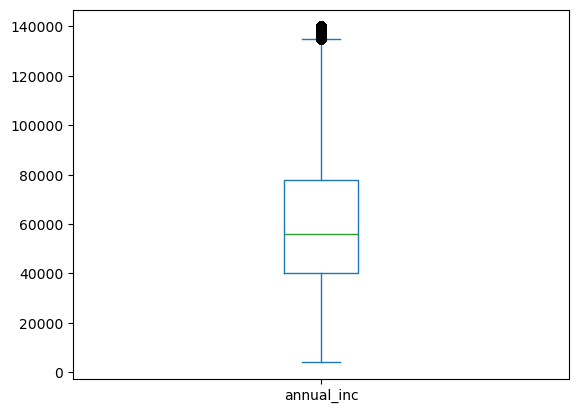

In [45]:
df2['annual_inc'].plot.box()
plt.show()

# Now the annual_inc values looks resonable

* `loan_amnt`

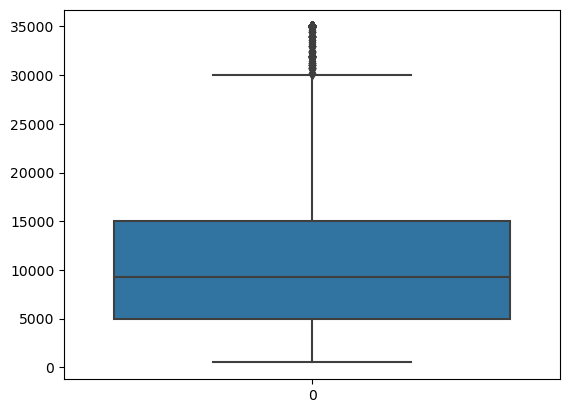

In [47]:
sns.boxplot(df2['loan_amnt'])
plt.show()
# loan_amnt columns data destribution looks good to me

* `funded_amnt_inv`

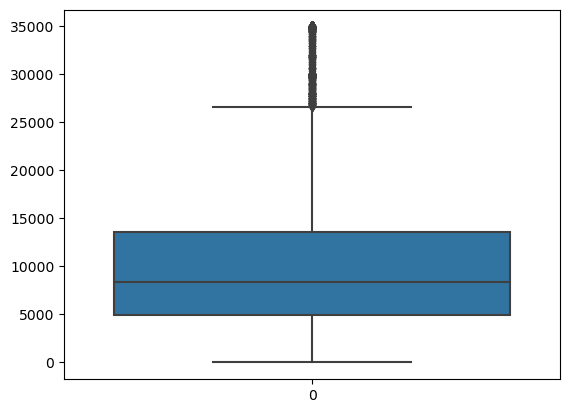

In [49]:
sns.boxplot(df2['funded_amnt_inv'])
plt.show()
# funded_amnt_inv columns data destribution looks good to me

* `int_rate`

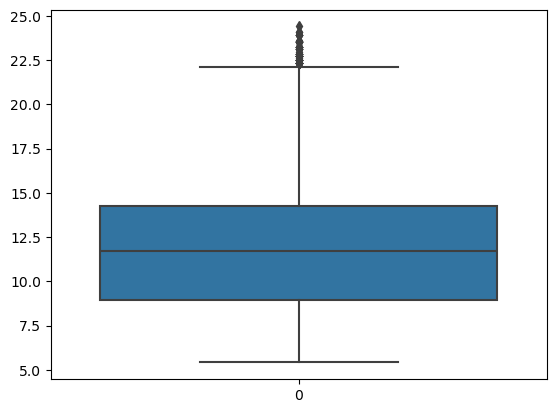

In [51]:
sns.boxplot(df2['int_rate'])
plt.show()
# int_rate columns data destribution looks good to me

* `installment`

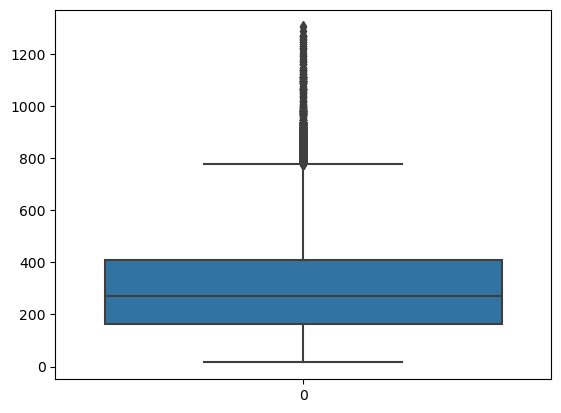

In [53]:
sns.boxplot(df2['installment'])
plt.show()
# installment columns data destribution looks good to me

* `dti`

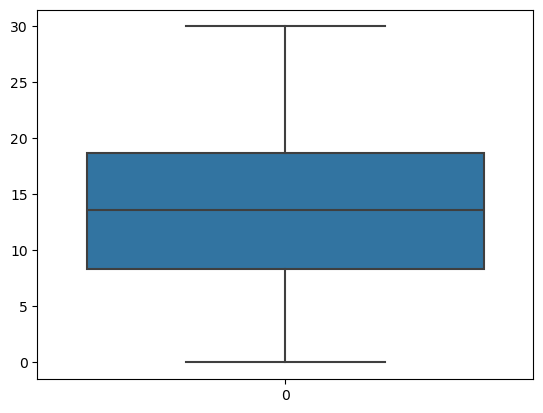

In [55]:
sns.boxplot(df2['dti'])
plt.show()
# dti columns data destribution looks good to me

* `revol_util`

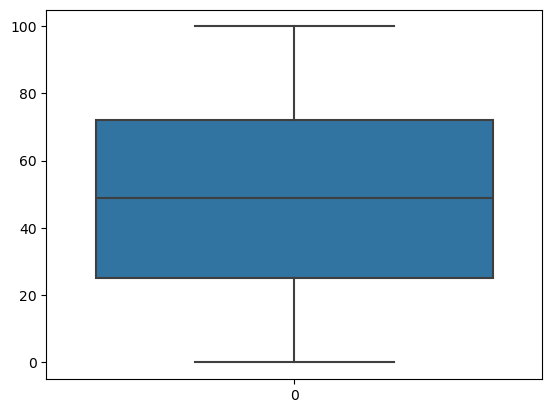

In [57]:
sns.boxplot(df2['revol_util'])
plt.show()
# revol_util columns data destribution looks good to me

In [58]:
#Lets same this after the outliers and values standardization
df2.to_csv(f'{intermediate_save_path}loan_outliers_standardization.csv', index=False)

In [59]:
df3 = pd.read_csv('loan_outliers_standardization.csv')

# Univariate Analysis
### Now the the integer values are fixed and we can look into categorical data
* loan_status
* subgrade
* grade
* home_ownership
* purpose
* term
* verification_status

## Analyzing loan_status

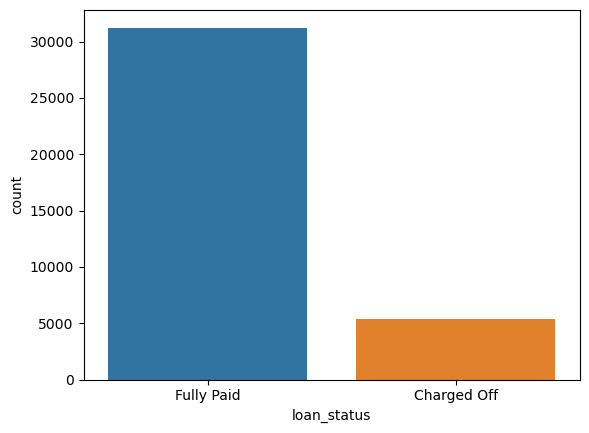

In [62]:
sns.countplot(x = 'loan_status', data=df3)
plt.show()

## Loan_status is 'Charged Off' 
* Since this analysis is on Loan defaulters out focuss should be in the the data were Loan_status is 'Charged Off' 

In [64]:
Changed_of_df = df3[df3.loan_status == 'Charged Off']

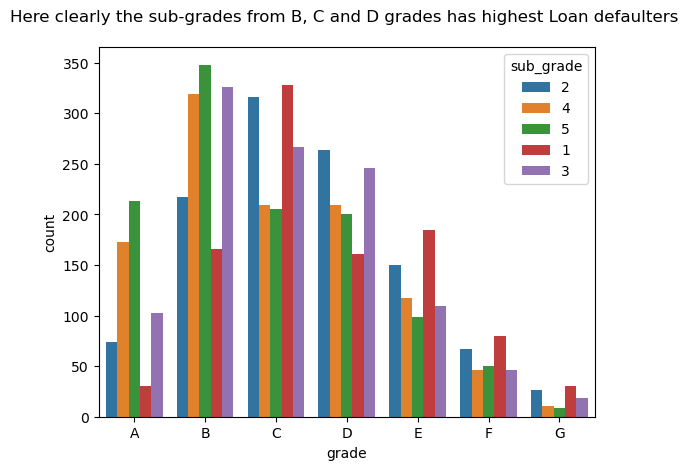

In [65]:
sns.countplot(x = 'grade',data = Changed_of_df, 
              hue=df3['sub_grade'].astype('str'), order=['A', 'B', 'C', 'D', 'E', 'F', 'G'],)
plt.title("Here clearly the sub-grades from B, C and D grades has highest Loan defaulters \n")
plt.show()

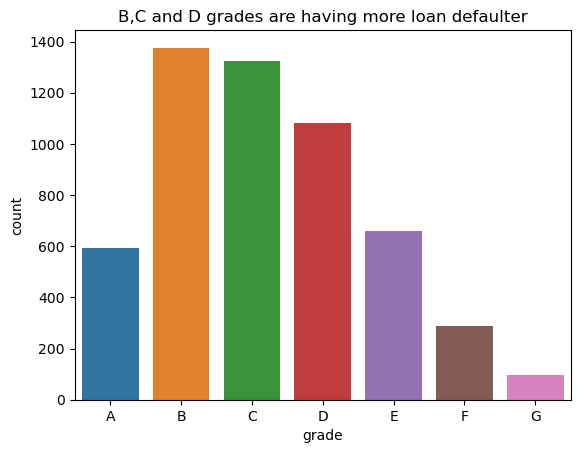

In [66]:
sns.countplot(x = 'grade', data = Changed_of_df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('B,C and D grades are having more loan defaulter')
plt.show()

### Analyzing home owners

In [68]:
df3['home_ownership'].value_counts()

# Lets merge NONE to other category as it does not have significant impact on analysis as its count is only 3

home_ownership
RENT        18031
MORTGAGE    15675
OWN          2852
OTHER          93
NONE            3
Name: count, dtype: int64

In [69]:
df3['home_ownership'].replace(to_replace=['NONE'], value='OTHER', inplace=True)

In [70]:
df3['home_ownership'].value_counts()

home_ownership
RENT        18031
MORTGAGE    15675
OWN          2852
OTHER          96
Name: count, dtype: int64

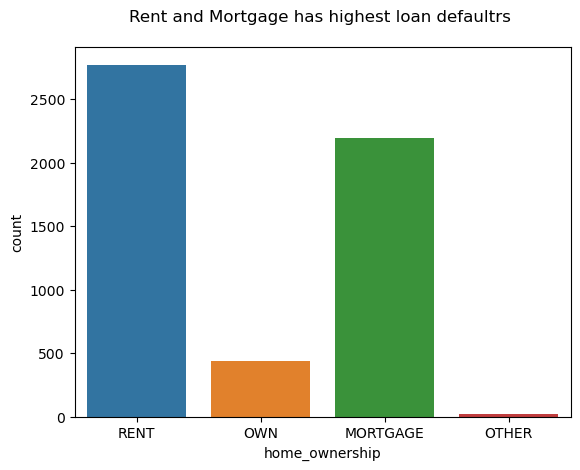

In [71]:
sns.countplot(x='home_ownership', data=Changed_of_df)
plt.title("Rent and Mortgage has highest loan defaultrs \n")
plt.show()

### Analyzing Purpose column

In [73]:
df3['purpose'].value_counts()

purpose
debt_consolidation    17305
credit_card            4783
other                  3699
home_improvement       2556
major_purchase         2046
small_business         1623
car                    1448
wedding                 893
medical                 641
moving                  550
vacation                365
house                   338
educational             312
renewable_energy         95
Name: count, dtype: int64

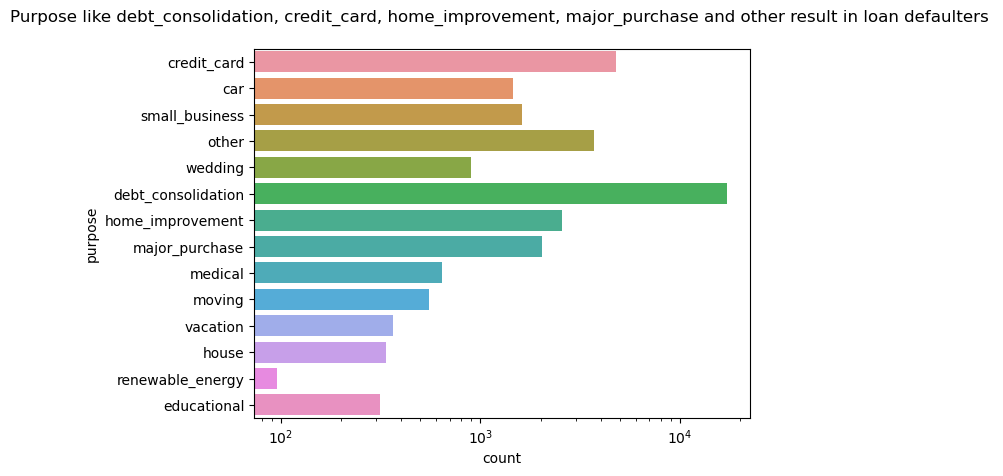

In [74]:
fig, ax = plt.subplots()
ax.set_xscale('log')
sns.countplot(y=df3['purpose'], data = Changed_of_df, ax=ax)
plt.title("Purpose like debt_consolidation, credit_card, home_improvement, major_purchase and other result in loan defaulters \n")
plt.show()

### Categorizing numerical values to create groups from them to get better understanding of the data
* int_rate
* open_acc
* revol_util
* total_acc
* annual_inc
* Loan

In [76]:
# interest rate groups 
bins = np.linspace(5, 24, 6)
labels = [f'{bins[i]:.0f}%-{bins[i+1]:.0f}%' for i in range(len(bins)-1)]
df3['int_rate_groups'] = pd.cut(df3['int_rate'], bins=bins, labels=labels, precision=0, include_lowest=True)

In [77]:
# open_acc group
bins = np.linspace(2, 44,6)
labels = [f'{bins[i]:.0f}-{bins[i+1]:.0f}' for i in range(len(bins)-1)]
df3['open_acc_group'] = pd.cut(df3['open_acc'], bins=bins, labels=labels, precision=0, include_lowest=True)

In [78]:
# revol_util group
bins = np.linspace(1, 100,6)
labels = [f'{bins[i]:.0f}-{bins[i+1]:.0f}' for i in range(len(bins)-1)]
df3['revol_util_group'] = pd.cut(df3['revol_util'], bins=bins, labels=labels, precision=0, include_lowest=True) 

In [79]:
# total_acc group
bins = np.linspace(2, 90,6)
labels = [f'{bins[i]:.0f}-{bins[i+1]:.0f}' for i in range(len(bins)-1)]
df3['total_acc_group'] = pd.cut(df3['total_acc'], bins=bins, labels=labels, precision=0, include_lowest=True) 

In [80]:
# annual_inc group
bins = np.linspace(2, 140, 6)
labels = [f'{bins[i]:.0f}k-{bins[i+1]:.0f}k' for i in range(len(bins)-1)]
df3['annual_inc_group'] = pd.cut(df3['annual_inc'], bins=5, labels=labels, precision=0, include_lowest=True) 

In [81]:
bins = np.linspace(2, 35, 6)
labels = [f'{bins[i]:.0f}k-{bins[i+1]:.0f}k' for i in range(len(bins)-1)]
df3['loan_amnt_group'] = pd.cut(df3['loan_amnt'], bins=5, labels=labels, precision=0, include_lowest=True)

## Analyzing data based on groups created above
* int_rate_groups
* open_acc_group
* revol_util_group
* total_acc_group
* annual_inc_group
* loan_amnt_group

* `int_rate_groups`

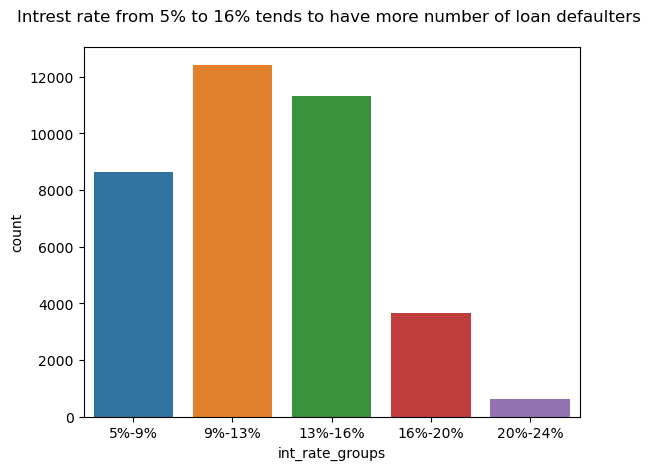

In [84]:
sns.countplot(x=df3['int_rate_groups'],data=Changed_of_df)
plt.title("Intrest rate from 5% to 16% tends to have more number of loan defaulters \n")
plt.show()

* `open_acc_group`

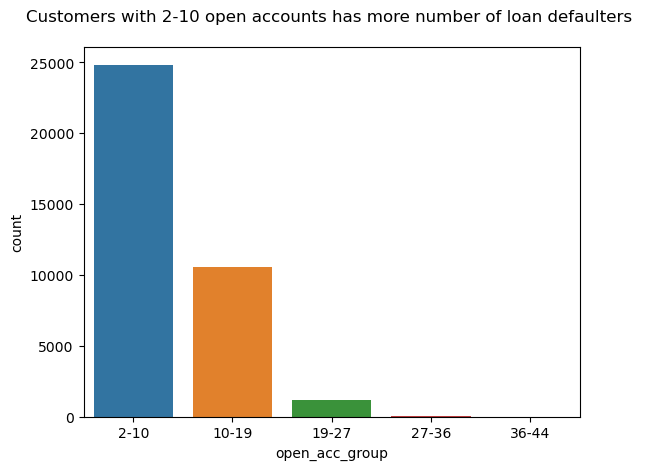

In [86]:
sns.countplot(x=df3['open_acc_group'], data = Changed_of_df)
plt.title('Customers with 2-10 open accounts has more number of loan defaulters \n')
plt.show()

* `revol_util_group`

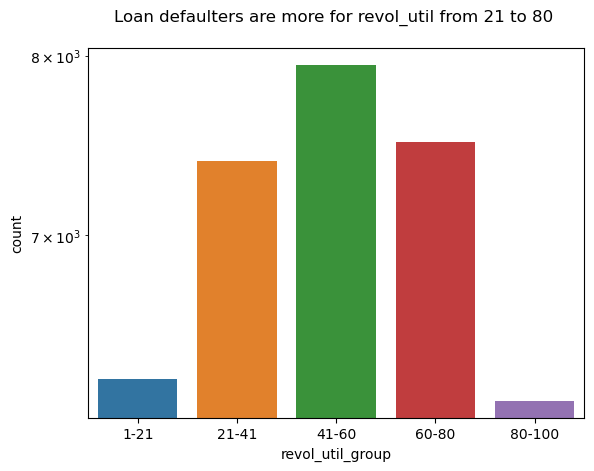

In [88]:
fig, ax = plt.subplots()
ax.set_yscale('log')
sns.countplot(x=df3['revol_util_group'], data = Changed_of_df)
plt.title("Loan defaulters are more for revol_util from 21 to 80 \n")
plt.show()

* `total_acc_group`

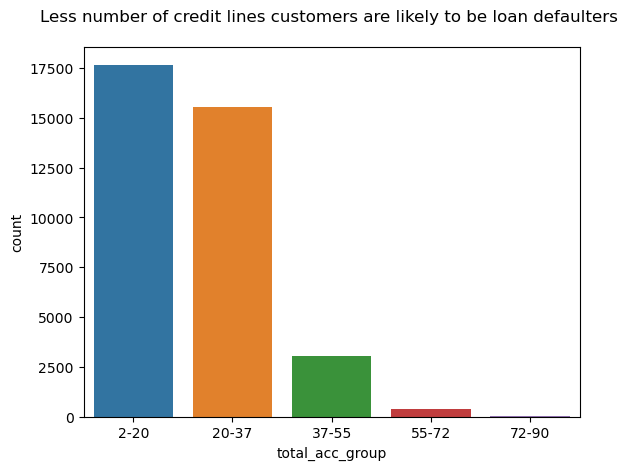

In [90]:
sns.countplot(x=df3['total_acc_group'],  data = Changed_of_df)
plt.title('Less number of credit lines customers are likely to be loan defaulters \n')
plt.show()

* `annual_inc_group`

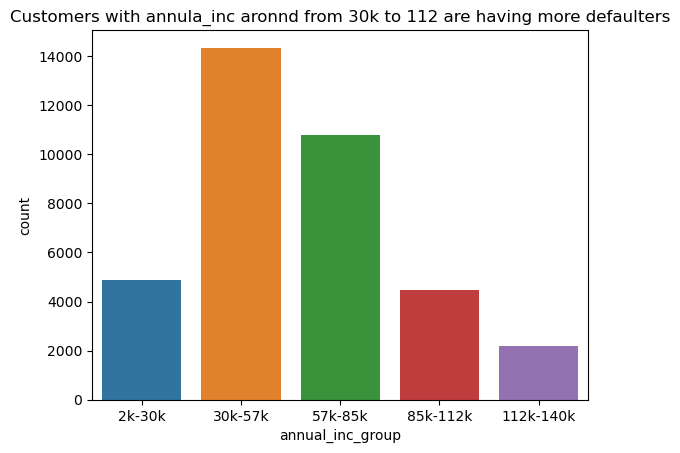

In [92]:
sns.countplot(x=df3['annual_inc_group'], data = Changed_of_df)
plt.title("Customers with annula_inc aronnd from 30k to 112 are having more defaulters")
plt.show()

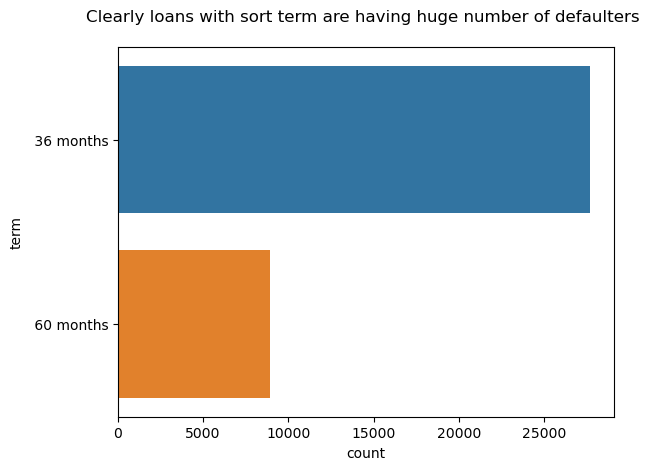

In [93]:
# checking the loan defaulters based on loan period 
sns.countplot(y=df3['term'], data = Changed_of_df)
plt.title("Clearly loans with sort term are having huge number of defaulters \n")
plt.show()

* `verification_status`

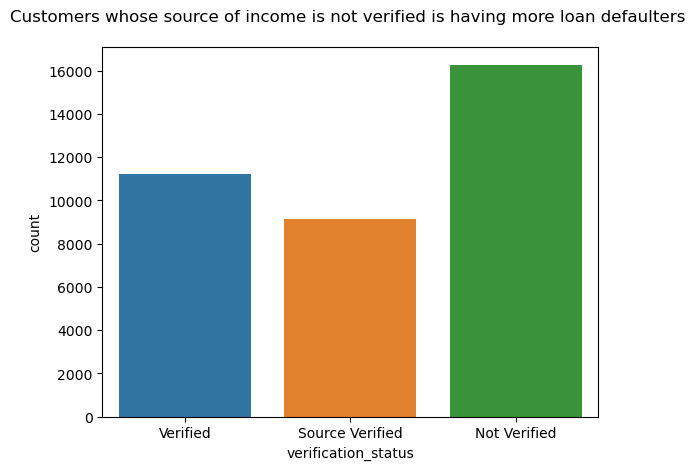

In [95]:
sns.countplot(x=df3['verification_status'], data = Changed_of_df)
plt.title("Customers whose source of income is not verified is having more loan defaulters \n")
plt.show()

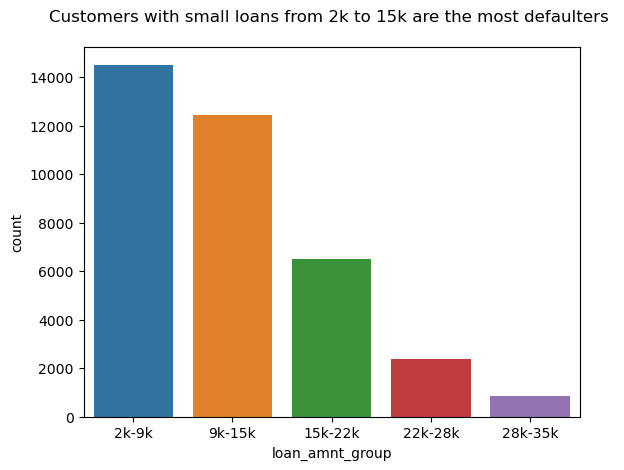

In [96]:
sns.countplot(x=df3['loan_amnt_group'], data = Changed_of_df)
plt.title("Customers with small loans from 2k to 15k are the most defaulters \n")
plt.show()

# Observations from Univeriate Analysis
* Customers with puposes like **debt_consolidation**, **credit_card**, **home_improvement**, **major_purchase** and **other** are likely to be in defaulters list
* Loans with intrest rate from **5%** to **16%** are having most loan defaultes
* Customeres with **2-10** open accounts are having most loan defaulters
* Customers with less number of credit lines are likely to be loan defaulters
* Customers with Annual income from **30k to 85k** are having more loan defaulters
* Sort tearm loans **(36 Months)** are resulting in more defaulters
* Unverified income source are also having high defaulters list on compare with verified income source
* Sub grade loans like B3, B5, B4 from **B grade** , C1, C1, C3 from **C grade** and D2, D3 from **D grade** are having huge more loan defaulters
* Small loan amount like 2k to 15k are also going into defaulters list

# Bivariate Analysis
### Here we will be analysing two variables/columns to understand the data more clearly
* annual_inc and purpose
* annual_inc and home_owenership
* annual_inc and int_rate
* annual_inc and loan_amnt
* loan_amnt and int_rate
* loan_amnt and purpose
* loan_amnt and grade
* int_rate and grade

* `annual_inc and purpose`

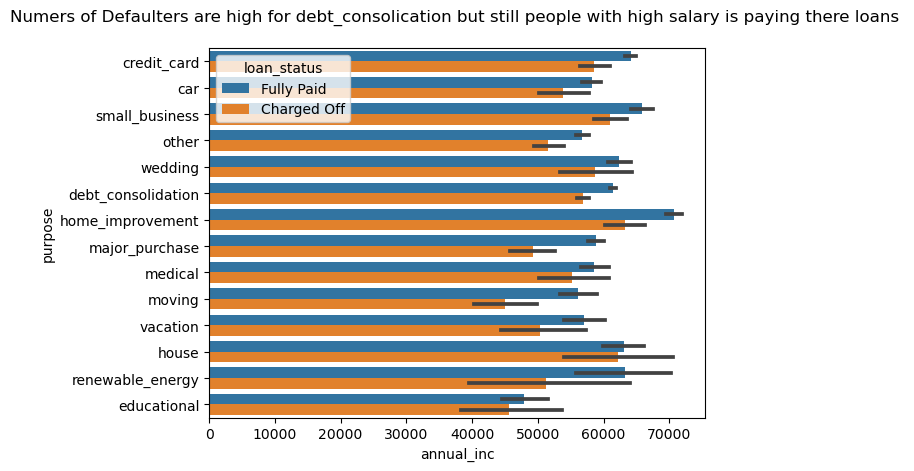

In [100]:
sns.barplot(data = df3, y=df3['purpose'], x=df3['annual_inc'], hue=df3['loan_status'])
plt.title("Numers of Defaulters are high for debt_consolication but still people with high salary is paying there loans \n")
plt.show()

### From above analysis we can see a trend that for each purpose people with high salary are most likey to pay there loans on compared with people with less salary

* `annual_inc and home_owenership`

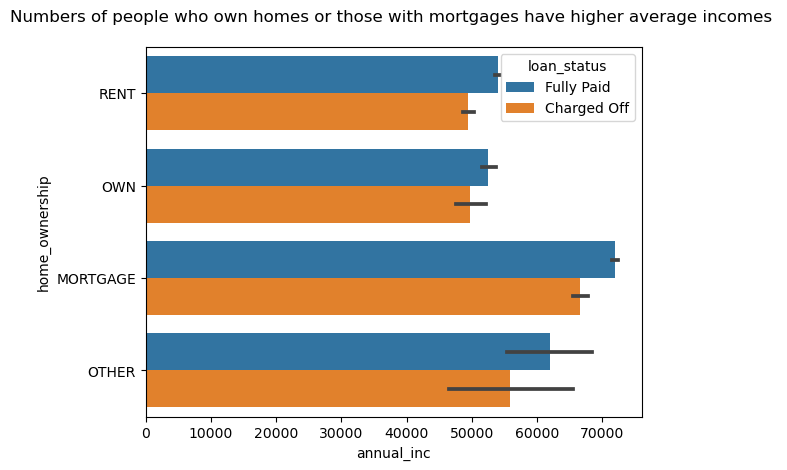

In [103]:
sns.barplot(data = df3, y=df3['home_ownership'], x=df3['annual_inc'], hue=df3['loan_status'])
plt.title("Numbers of people who own homes or those with mortgages have higher average incomes \n")
plt.show()

### From above analysis we can see a trend that people with higher incomes, especially those who own homes or have mortgages, tend to have a better loan repayment record, while lower-income renters might have a higher likelihood of default or charged-off loans.

* `annual_inc and int_rate`

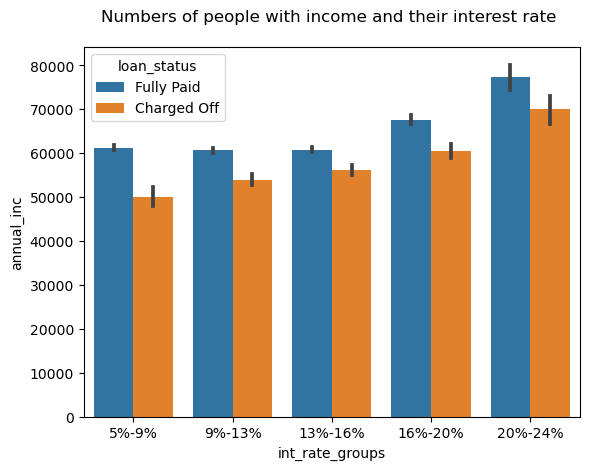

In [106]:
sns.barplot(data = df3, x=df3['int_rate_groups'], y=df3['annual_inc'], hue=df3['loan_status'])
plt.title("Numbers of people with income and their interest rate \n")
plt.show()

### From above analysis we can see a trend that people with high annual income fall into higher interest rate.
### This chart can give insights into the relationship between income levels, interest rates, and loan repayment performance. If most people with lower interest rates have higher incomes and more fully paid loans, it may indicate that lenders assign lower rates to more financially stable borrowers.

* `annual_inc and loan_amnt`

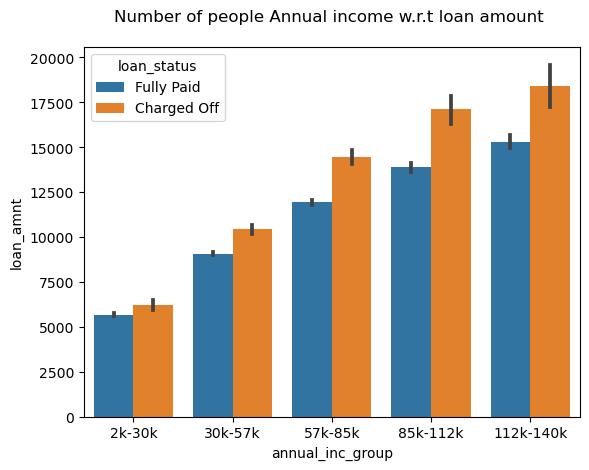

In [109]:
sns.barplot(x = df3["annual_inc_group"], y = df3["loan_amnt"], hue = df3['loan_status'], data = df3, )
plt.title("Number of people Annual income w.r.t loan amount \n")
plt.show()

### From above analysis we can see a trend that people with high annual income fall into higher interest rate.
### This chart can give insights into the relationship between income levels, interest rates, and loan repayment performance. If most people with lower interest rates have higher incomes and more fully paid loans, it may indicate that lenders assign lower rates to more financially stable borrowers.

* `loan_amnt and int_rate`

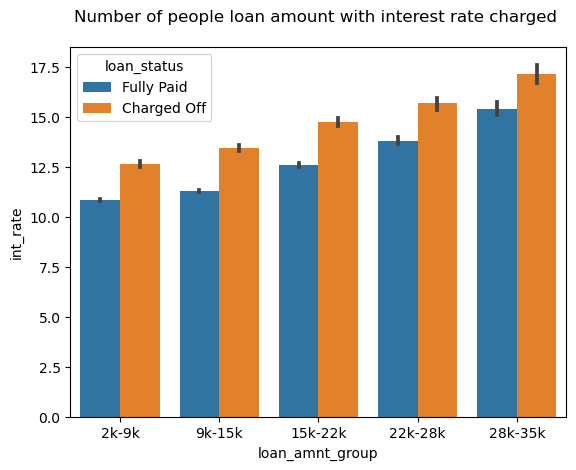

In [112]:
sns.barplot(data =df3,x=df3['loan_amnt_group'], y=df3['int_rate'], hue =df3['loan_status'])
plt.title("Number of people loan amount with interest rate charged \n")
plt.show()

### Above chat anaylsis Charged Off portion is larger for a 22k-28k,28k-35k loan amount group with high interest rates, it might suggest that higher interest rates could contribute to a higher likelihood of default, as borrowers may struggle to repay those loans.

* `loan_amnt and purpose`

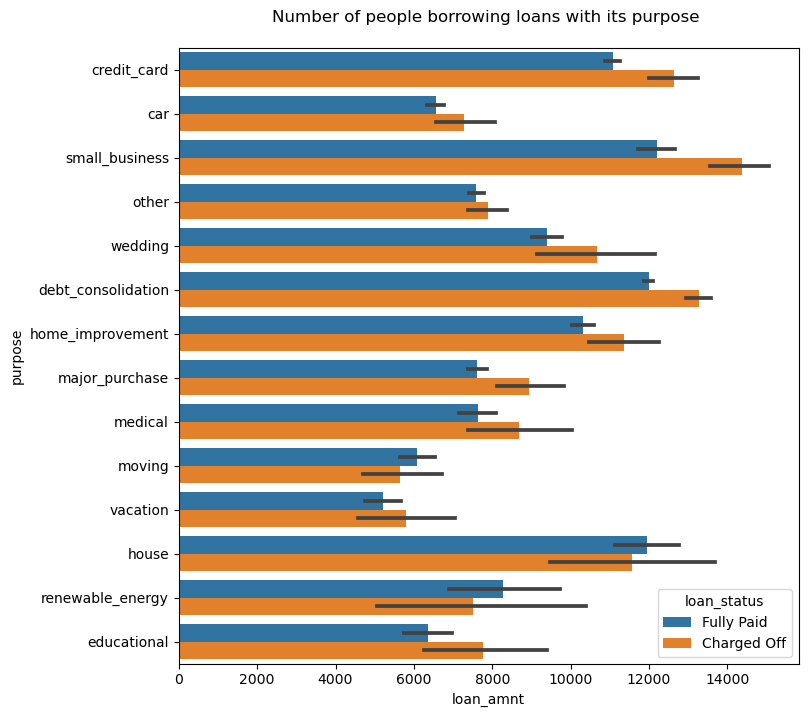

In [115]:
plt.figure(figsize=(8,8))
sns.barplot(data =df3,x=df3['loan_amnt'], y=df3['purpose'], hue =df3['loan_status'])
plt.title("Number of people borrowing loans with its purpose \n")
plt.show()

### From above anaylsis we can see that small business, credit cards,house ,debt_consloditaion have higher charged off with high financial loan lending risk 

* `loan_amnt and grade`

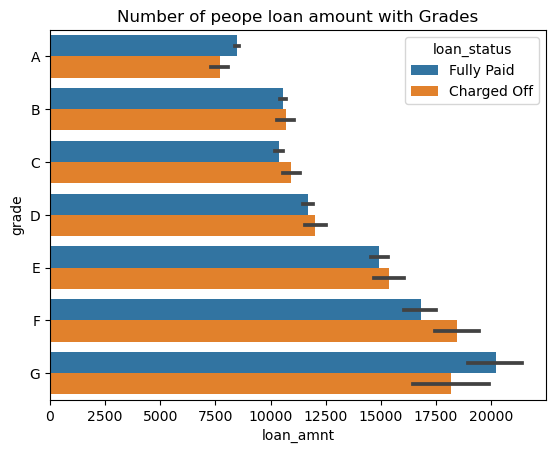

In [118]:
sns.barplot(data =df3,x='loan_amnt', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.title("Number of peope loan amount with Grades")
plt.show()

###  Above trend analysis  Higher grades (A and B) are associated with lower loan amounts compared to lower grades (F and G), indicating that borrowers with better credit ratings may be borrowing less, possibly because they can obtain loans more easily and borrowers in lower grades may need to take larger loans due to higher interest rates or financial constraints.
### Loans in lower grades (F, G) show as Charged Off, it suggests that borrowers with lower credit grades may be struggling to repay their loans.
### Higher grades shows higher percentage of Fully Paid loans, indicating that borrowers with better credit ratings does reliable payments.

* `int_rate and grade`

In [121]:
sns.barplot(data =df3,x=df3['int_rate'], y=df3['grade'], hue =df['loan_status'], order=['A','B','C','D','E','F','G'])
plt.title("Number of people loan comparison with Grade and Interest rate")
plt.show()

NameError: name 'df' is not defined

### Above trend analysis large number of borrowers in a G & F grade are taking loans at high interest rates, it might suggest that these borrowers are willing to accept higher costs due to limited options or urgent financial needs.
### A,B,C grades are associated with lower interest rates, as these represent borrowers deemed less risky. Whereas, E,F,G grades taken loan on higher interest rates, indicating a higher risk of default.

# Observations from Bivariate Anaylsis
* Individuals applying for loans aimed at **home improvement** with an income between **60,000** and **70,000**.
* Borrowers who own homes under a **MORTGAGE** status, earning between **60,000** and **70,000**.
* Applicants with an income ranging from **70,000** to **80,000** who are offered interest rates between **21%** and **24%**.
* Borrowers with incomes between **112,000** and **140,000** who have taken out loans of **15,000** to **20,000**.
* Individuals who have secured loans in the range of **30,000** to **35,000**, facing interest rates of **15%** to **17.5%**.
* Borrowers seeking loans for small business ventures that exceed **14,000**.
* Applicants classified with a grade of F and taking loans ranging from **15,000** to **20,000**.
* Individuals with a grade of **G** who are charged interest rates above **20%**.

In [ ]:
df3.columns